In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
def costFun(theta, X_train, Y_train):
    m = X_train.shape[0]
    cost =0
    X_train = X_train + 1
    for i in range(m):
        y = np.matmult(theta,X_train) 
        cost = cost + (Y_train[i]-y)**2
    J = (1/(2*m))*cost
    return J ## The Cost Function Value as told in Class.

In [209]:
def diffCostFun(theta, X_train, Y_train):
    Z = X_train.transpose()
    gradient_of_J = np.matmul(Z,X)*theta - Z*Y_train
    return gradient_of_J ## The gradient Vector as discussed in class


In [210]:
def fitGD(X_train, Y_train, alpha, lamda, Type_of_Regularization, Iterations):
    m = X_train.shape[0]
    test = np.zeros(Iterations)
    theta = np.ones(m)
    
    for i in range (Iterations):
        deriv_J = diffCostFun(theta, X_train, Y_train)
        theta = theta - alpha*deriv_J 
        J= costFun(theta, X_train, Y_train)
        test[i] = J
        
    plt.plot(test)
    J = costFun(theta, X_train, Y_train)
    regu = 0
    
    if(Type_of_Regularization==1):
        for i in range (m):
            regu = regu + theta[i]
        
    if(Type_of_Regularization==2):
        J = costFun(theta, X_train, Y_train)
        regu = 0
        for i in range (m):
            regu = regu + theta[i]**2
        regu = regu/2
        
    regu = regu*lamda/m
    J = J + regu
    
     #This Function performs batch Gradient Descent for our training dataset with the
     #given parameters as input. It should return the trained parameters and should also plot
     #the graph of J(theta) vs iteration number for each time it runs using Batch Gradient
     #Descent. Use vectorized implementation.

    return theta


In [211]:
def fitNormal(X_train, Y_train):
    Z = X_train.transpose()
    theta = (Z*Y_train)/(Z*X_train)
        ##This Function learns the parameter theta using the Normal Equations method.
    return theta

In [212]:
def locallyWeighted(X_train, Y_train, x, tau):
    m = X_train.shape[0]
    W=np.zeros(X_train.shape[0])
    for i in range(m):
        W[i] = np.exp(-(X_train[i]-x)**2/2*tau**2)
    
    Z = X_train.transpose()
    theta = (1/(Z*W*X_train))*(Z*W*Y_train)
    
    y = theta*x
        #returns prediction of y for given x through locally weighted Regression
    return y


In [213]:
def error_train(Y_train, Y_pred_train):
    m = Y_pred_train.shape[0]
    error = 0
    for i in range(m):
        error = error + (Y_train[i]-Y_pred_train[i]**2)/(2*m)
    return error

def error_test(Y_train, Y_pred_test):
    m = Y_pred_test.shape[0]
    error = 0
    for i in range(m):
        error = error + (Y_test[i]-Y_pred_test[i]**2)/(2*m)
    return error

In [214]:
X_train = np.array([2.5, 4.7 , 5.2, 7.3, 9.5, 11.5])
Y_train = np.array([5.21, 7.70, 8.30, 11, 14.5, 15]).T
X_train +1


array([ 3.5,  5.7,  6.2,  8.3, 10.5, 12.5])

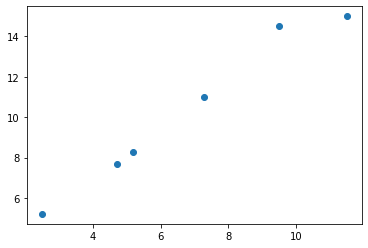

In [215]:
plt.scatter(X_train,Y_train)
plt.show()

C:\Users\asjasdraza13\AppData\Local\Temp\ipykernel_22812\2851576608.py:7: RuntimeWarning: overflow encountered in double_scalars
  cost = cost + (Y_train[i]-y)**2
C:\Users\asjasdraza13\AppData\Local\Temp\ipykernel_22812\122131775.py:3: RuntimeWarning: overflow encountered in multiply
  gradient_of_J = (1/m)*np.sum(theta*(np.dot(theta.T,X_train)-Y_train))


array([-inf, -inf, -inf, -inf, -inf, -inf])

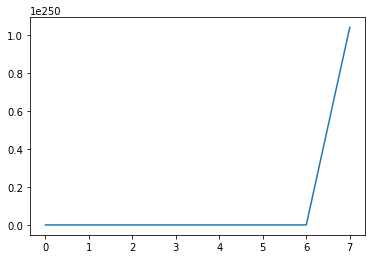

In [207]:
theta = fitGD(X_train, Y_train, 0.1, 0.1, 0, 100)
theta

In [216]:
theta = fitNormal(X_train, Y_train)
theta

array([2.084     , 1.63829787, 1.59615385, 1.50684932, 1.52631579,
       1.30434783])

In [217]:
y = locallyWeighted(X_train, Y_train, 5, 0.1)
y

array([10.42      ,  8.19148936,  7.98076923,  7.53424658,  7.63157895,
        6.52173913])